In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df1 = pd.read_csv('2018-2019 ongc.txt', delimiter='\t', encoding='utf-16')

In [5]:
df1.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01-12-2019,128.80,131.05,131.45,124.05,168.14M,-2.24%
1,01-11-2019,131.75,140.55,149.65,129.25,165.12M,-7.02%
2,01-10-2019,141.70,131.50,146.15,123.95,229.64M,7.51%
3,01-09-2019,131.80,120.50,140.85,115.55,271.43M,8.75%
4,01-08-2019,121.20,138.50,139.75,115.75,234.73M,-12.71%


In [7]:
df2 = pd.read_csv('2020-2021 ongc.txt', delimiter='\t', encoding='utf-16')

In [9]:
df2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01-12-2021,142.40,142.40,150.50,131.65,228.70M,0.21%
1,01-11-2021,142.10,150.00,162.25,141.10,357.50M,-4.66%
2,01-10-2021,149.05,145.20,172.75,144.10,685.08M,3.15%
3,01-09-2021,144.50,121.80,148.80,117.50,543.96M,19.87%
4,01-08-2021,120.55,114.95,121.00,108.50,281.21M,4.55%


In [11]:
df3 = pd.read_csv('2022-2023 ongc.txt', delimiter='\t', encoding='utf-16')

In [13]:
df3.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01-12-2021,142.40,142.40,150.50,131.65,228.70M,0.21%
1,01-11-2021,142.10,150.00,162.25,141.10,357.50M,-4.66%
2,01-10-2021,149.05,145.20,172.75,144.10,685.08M,3.15%
3,01-09-2021,144.50,121.80,148.80,117.50,543.96M,19.87%
4,01-08-2021,120.55,114.95,121.00,108.50,281.21M,4.55%


In [49]:
df4 = pd.read_csv('Crude Oil WTI Futures Historical Data (5) (1).txt', delimiter=r'\s+|\|', encoding='utf-8',engine = 'python')

In [57]:
df4.columns = df4.columns.str.strip()

In [59]:
df4.head()

,Date,Price,Open,High,Low,Vol.,Change,%
0,01-12-2023,6128,6425,6425,5765,1.47K,-4.43%,NaN
1,01-11-2023,6412,6891,6891,6110,11.15K,-5.66%,NaN
2,01-10-2023,6797,7200,7298,62,2.88M,-7.41%,NaN
3,01-09-2023,7341,6985,7574,6985,0.43K,9.49%,NaN
4,01-08-2023,6705,6655,6958,6539,0.81K,1.50%,NaN


## Shapiro-Wilk Test

In [61]:
datasets = {'2018-2019 ongc.txt': df1, '2020-2021 ongc.txt': df2, '2022-2023 ongc.txt': df3, 'Crude Oil WTI Futures Historical Data (5) (1).txt': df4}


Normality Test for 2018-2019 ongc.txt
Shapiro-Wilk Test for Price: Statistics=0.971, p-value=0.679
Price seems to follow a normal distribution (fail to reject H0)


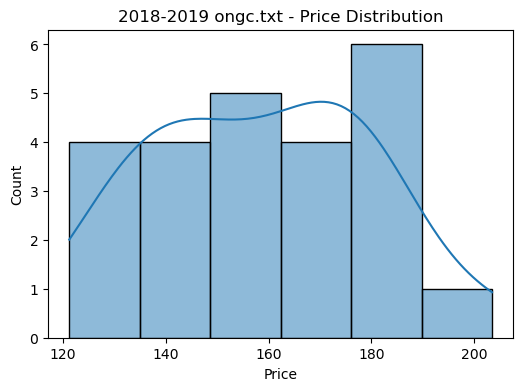


Normality Test for 2020-2021 ongc.txt
Shapiro-Wilk Test for Price: Statistics=0.931, p-value=0.101
Price seems to follow a normal distribution (fail to reject H0)


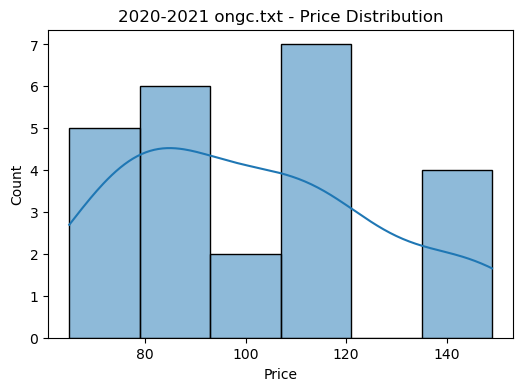


Normality Test for 2022-2023 ongc.txt
Shapiro-Wilk Test for Price: Statistics=0.931, p-value=0.101
Price seems to follow a normal distribution (fail to reject H0)


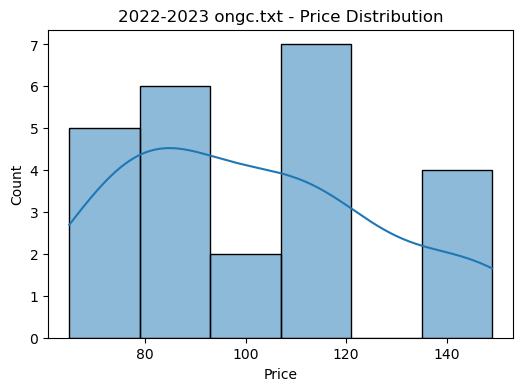


Normality Test for Crude Oil WTI Futures Historical Data (5) (1).txt
Shapiro-Wilk Test for Price: Statistics=0.979, p-value=0.287
Price seems to follow a normal distribution (fail to reject H0)


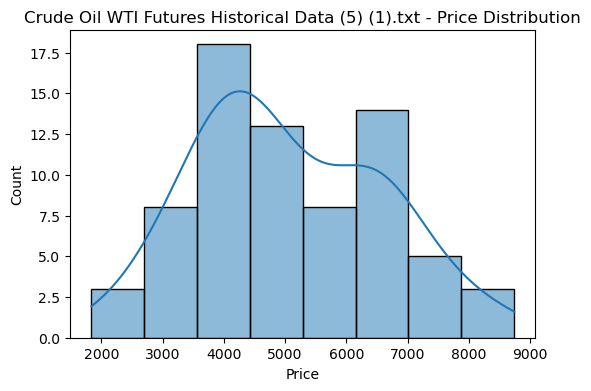

In [63]:
# Function to test normality using Shapiro-Wilk test
def test_normality(data, column):
    stat, p = stats.shapiro(data[column].dropna())  # Remove missing values if any
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat:.3f}, p-value={p:.3f}')
    if p > 0.05:
        print(f"{column} seems to follow a normal distribution (fail to reject H0)")
    else:
        print(f"{column} does not follow a normal distribution (reject H0)")

# Plot the data distribution and perform Shapiro-Wilk test for each dataset
for name, df in datasets.items():
    print(f"\nNormality Test for {name}")
     # Test Normality
    test_normality(df,'Price')
            
    # Plot distribution
    plt.figure(figsize=(6, 4))
    sns.histplot(df['Price'].dropna(), kde=True)
    plt.title(f'{name} - Price Distribution')
    plt.show()

### CHI SQUARE TEST


Chi-Square Test for 2018-2019 ongc.txt
Chi-Square Test for Price: Statistics=4.333, p-value=0.888
Price does not significantly differ from the expected distribution (fail to reject H0)


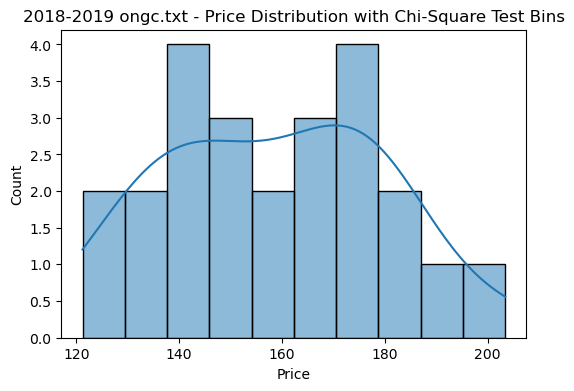


Chi-Square Test for 2020-2021 ongc.txt
Chi-Square Test for Price: Statistics=11.000, p-value=0.276
Price does not significantly differ from the expected distribution (fail to reject H0)


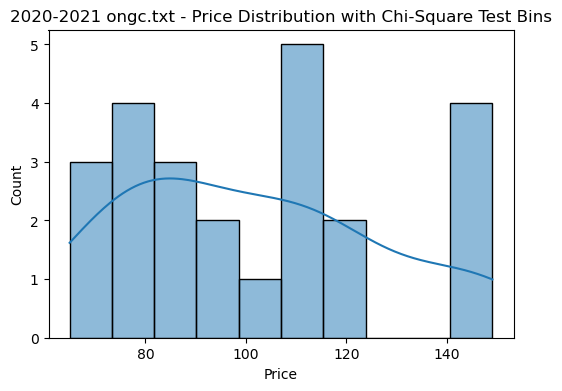


Chi-Square Test for 2022-2023 ongc.txt
Chi-Square Test for Price: Statistics=11.000, p-value=0.276
Price does not significantly differ from the expected distribution (fail to reject H0)


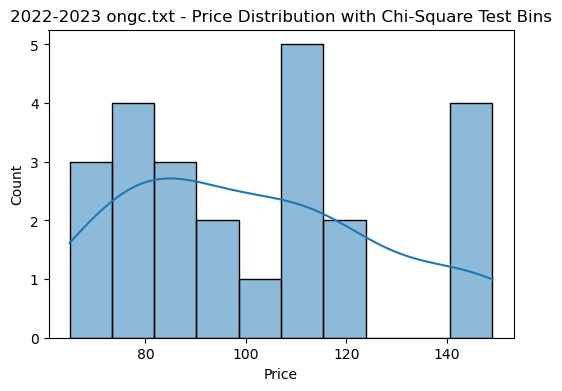


Chi-Square Test for Crude Oil WTI Futures Historical Data (5) (1).txt
Chi-Square Test for Price: Statistics=28.278, p-value=0.001
Price significantly differs from the expected distribution (reject H0)


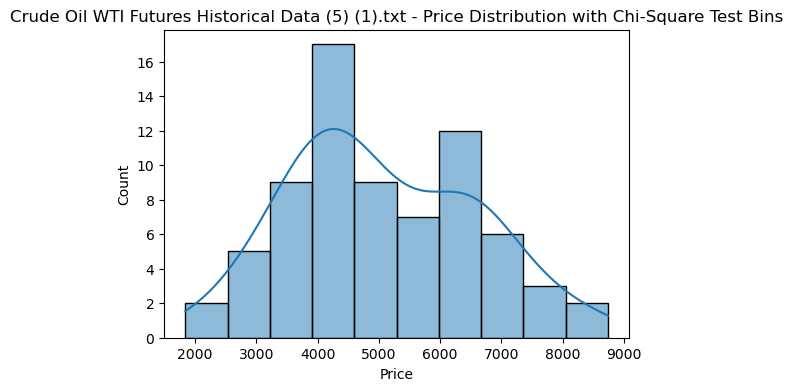

In [65]:
# Function to test goodness of fit using Chi-Square test
def test_chi_square(data, column, bins=10):
    # Drop missing values and bin data into specified number of bins
    observed_values, bin_edges = np.histogram(data[column].dropna(), bins=bins)
    
    # Calculate the expected frequency assuming a uniform distribution
    expected_values = [len(data[column].dropna()) / bins] * bins
    
    # Perform Chi-Square test
    stat, p = stats.chisquare(observed_values, f_exp=expected_values)
    print(f'Chi-Square Test for {column}: Statistics={stat:.3f}, p-value={p:.3f}')
    if p > 0.05:
        print(f"{column} does not significantly differ from the expected distribution (fail to reject H0)")
    else:
        print(f"{column} significantly differs from the expected distribution (reject H0)")

# Loop through each dataset and apply Chi-Square test
for name, df in datasets.items():
    print(f"\nChi-Square Test for {name}")
    
    
    
    test_chi_square(df,'Price', bins=10)
            
    # Plot histogram with KDE overlay
    plt.figure(figsize=(6, 4))
    sns.histplot(df['Price'].dropna(), kde=True, bins=10)
    plt.title(f'{name} - Price Distribution with Chi-Square Test Bins')
    plt.show()
